In [1]:
import torch
import numpy as np
import random
from models.architectures import srgan, srflow
import PIL
import os
import torchvision
from torchvision import transforms
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import rasterio

# Dataset loading
from data import dataloading
from data.era5_temp_dataset import InverseMinMaxScaler

from os.path import exists, join
import matplotlib.pyplot as plt
from matplotlib import transforms
import timeit
import pdb
import argparse
import seaborn as sns

from utils.metrics import *

# %load_ext autoreload
# %autoreload 2

Opening file: /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2007_v2.0.nc
Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2007_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['2007-01-01T12:00:00.000000000', '2007-01-02T12:00:00.000000000',
       '2007-01-03T12:00:00.000000000', ..., '2007-12-29T12:00:00.000000000',
       '2007-12-30T12:00:00.000000000', '2007-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375, 

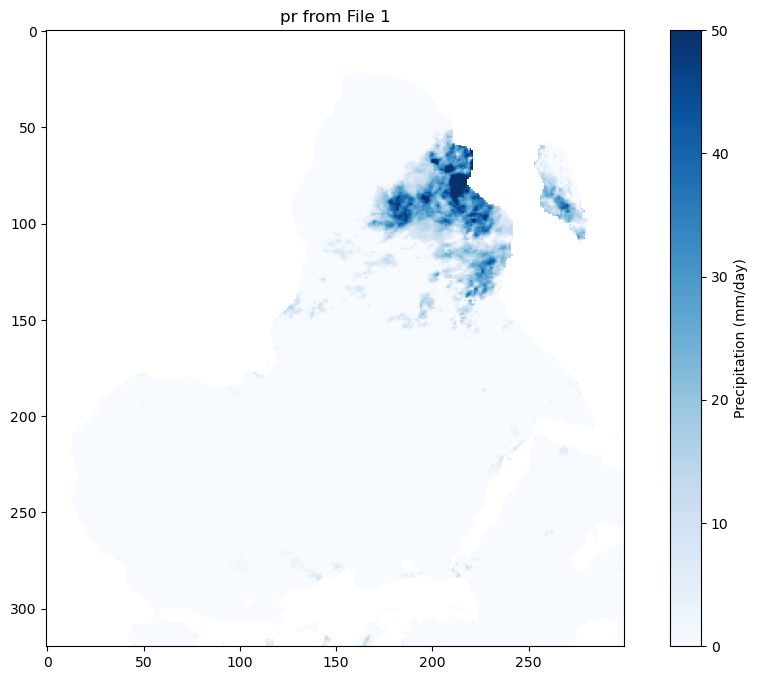

Opening file: /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_1982_v2.0.nc
Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_1982_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['1982-01-01T12:00:00.000000000', '1982-01-02T12:00:00.000000000',
       '1982-01-03T12:00:00.000000000', ..., '1982-12-29T12:00:00.000000000',
       '1982-12-30T12:00:00.000000000', '1982-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375, 

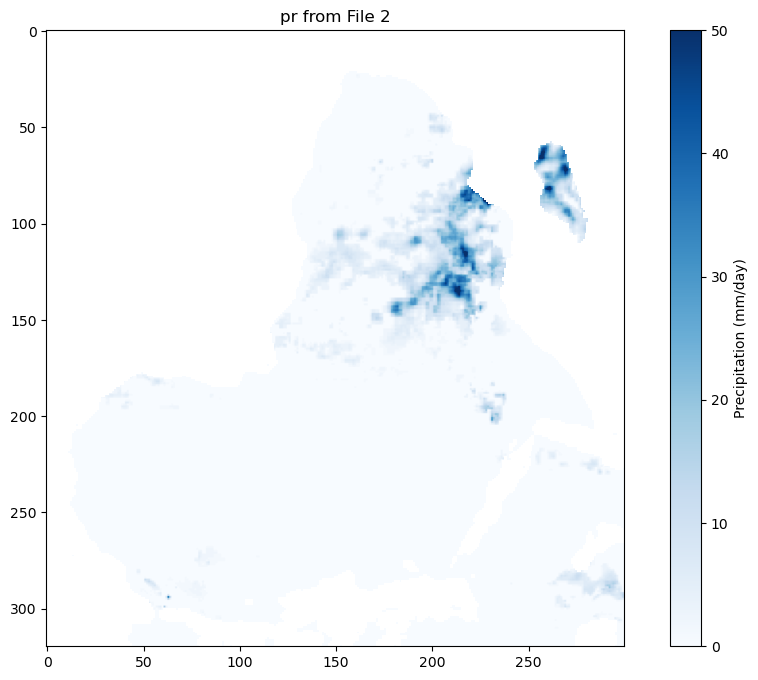

Opening file: /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_1986_v2.0.nc
Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_1986_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['1986-01-01T12:00:00.000000000', '1986-01-02T12:00:00.000000000',
       '1986-01-03T12:00:00.000000000', ..., '1986-12-29T12:00:00.000000000',
       '1986-12-30T12:00:00.000000000', '1986-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375, 

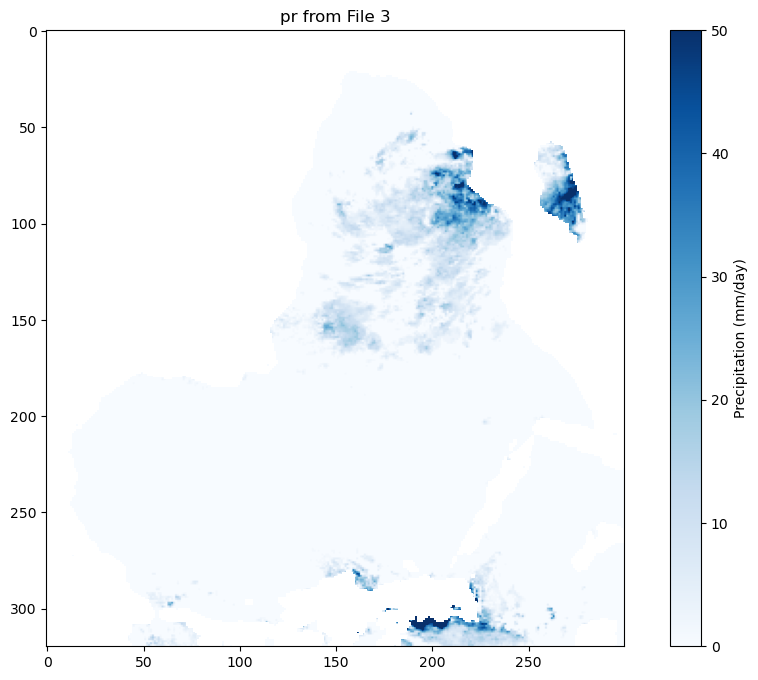

Opening file: /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2011_v2.0.nc
Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2011_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['2011-01-01T12:00:00.000000000', '2011-01-02T12:00:00.000000000',
       '2011-01-03T12:00:00.000000000', ..., '2011-12-29T12:00:00.000000000',
       '2011-12-30T12:00:00.000000000', '2011-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375, 

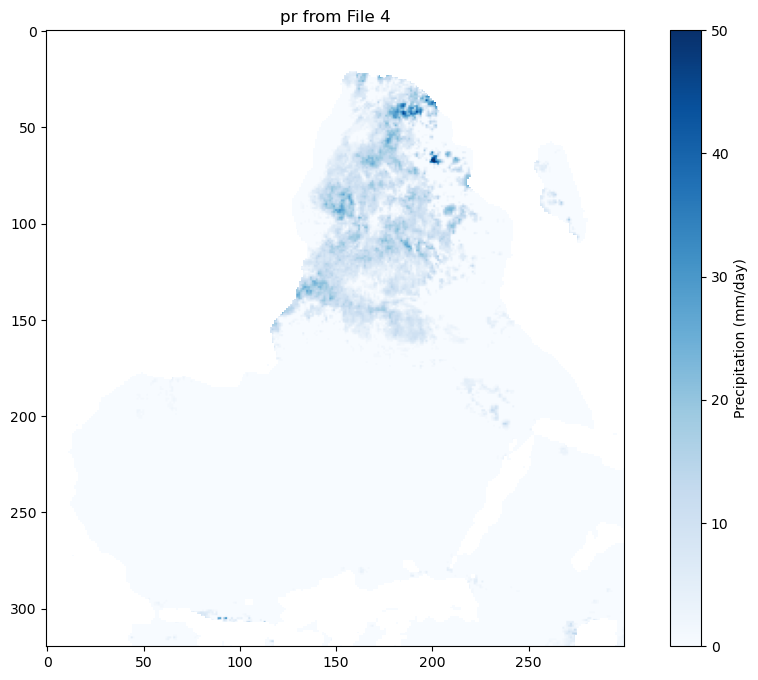

Opening file: /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2009_v2.0.nc
Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2009_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['2009-01-01T12:00:00.000000000', '2009-01-02T12:00:00.000000000',
       '2009-01-03T12:00:00.000000000', ..., '2009-12-29T12:00:00.000000000',
       '2009-12-30T12:00:00.000000000', '2009-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375, 

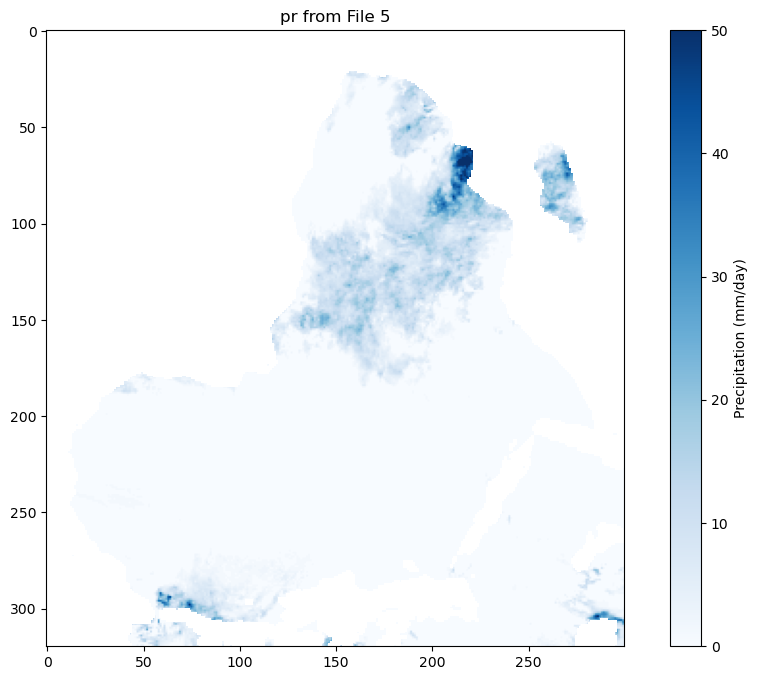

In [30]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

def visualize_files(folder_path, num_files=1):
    # List all NetCDF files in the folder
    nc_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]
    
    if not nc_files:
        raise ValueError("No NetCDF files found in the provided folder path.")
    
    # Limit the number of files to visualize
    if num_files > len(nc_files):
        raise ValueError(f"Requested number of files to visualize exceeds the number of available files. Available files: {len(nc_files)}")

    # Loop through the first `num_files` files
    for i, file in enumerate(nc_files[:num_files]):
        print(f"Opening file: {file}")
        
        try:
            dataset = xr.open_dataset(file)
        except Exception as e:
            print(f"Error opening file {file}: {e}")
            continue
        
        # Print available variables in the dataset
        print(f"Available variables in {file}:")
        print(dataset.variables)
        
        # Choose the variable to visualize (update based on your dataset)
        variable_name = 'pr'  # Replace with the actual variable name if different
        
        # Check if the dataset contains the variable
        if variable_name not in dataset:
            print(f"Variable '{variable_name}' not found in the dataset.")
            continue
        
        # Extract the variable data
        data = dataset[variable_name]
        
        # Check the dimensions and shape of the data
        print(f"Data shape: {data.shape}")
        print(f"Data dimensions: {data.dims}")

        # Plot the data
        plt.figure(num=i+1, figsize=(12, 8))  # Use a unique figure number
        
        # Use imshow to ensure a mappable object is created
        if 'time' in data.dims:
            img = plt.imshow(data.isel(time=0), cmap='Blues', vmin=0, vmax=50)
        else:
            img = plt.imshow(data, cmap='Blues', vmin=0, vmax=50)
        
        plt.title(f"{variable_name} from File {i+1}")
        plt.colorbar(img, label='Precipitation (mm/day)')
        plt.show()
        plt.close()  # Close the figure to free memory

# Example usage
folder_path = '/home/christina/Documents/clim-var-ds-cnf-own/data/precipitation'
num_files_to_plot = 5  # Set the number of files you want to visualize

try:
    visualize_files(folder_path, num_files=num_files_to_plot)
except Exception as e:
    print(f"An error occurred: {e}")


Available variables in /home/christina/Documents/clim-var-ds-cnf-own/data/precipitation/CHIRPS_total_precipitation_day_0.25x0.25_africa_2007_v2.0.nc:
Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['2007-01-01T12:00:00.000000000', '2007-01-02T12:00:00.000000000',
       '2007-01-03T12:00:00.000000000', ..., '2007-12-29T12:00:00.000000000',
       '2007-12-30T12:00:00.000000000', '2007-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 300)>
array([-19.875, -19.625, -19.375, ...,  54.375,  54.625,  54.875])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 320)>
array([-39.875, -39.625, -39.375, ...,  39.375,  39.625,  39.875])
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:        

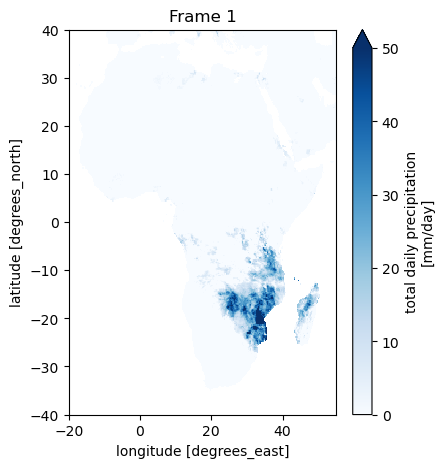

In [31]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

def count_frames_and_tile_spatially(folder_path, num_frames_to_plot=5, tile_shape=(1, 5)):
    # List all NetCDF files in the folder
    nc_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]
    
    if not nc_files:
        raise ValueError("No NetCDF files found in the provided folder path.")
    
    # Open the first NetCDF file
    first_file = nc_files[0]
    dataset = xr.open_dataset(first_file)
    
    # Print available variables in the dataset
    print(f"Available variables in {first_file}:")
    print(dataset.variables)
    
    # Choose the variable to visualize (you need to replace 'pr' with the actual variable name)
    variable_name = 'pr'  # Update this based on your dataset
    
    # Check if the dataset contains the variable
    if variable_name not in dataset:
        raise ValueError(f"Variable '{variable_name}' not found in the dataset.")
    
    # Extract the variable data
    data = dataset[variable_name]
    
    # Count the number of frames (time steps)
    num_frames = data.sizes['time']
    print(f"Number of frames (time steps): {num_frames}")
    
    # Plot the first `num_frames_to_plot` frames spatially
    num_frames_to_plot = min(num_frames_to_plot, num_frames)
    
    # Determine the grid shape for tiling
    rows, cols = tile_shape
    if rows * cols < num_frames_to_plot:
        raise ValueError("Tile shape is not sufficient to display the requested number of frames.")
    
    plt.figure(figsize=(cols * 5, rows * 5))  # Adjust the size for better readability
    
    for i in range(num_frames_to_plot):
        plt.subplot(rows, cols, i + 1)
        # Plot the spatial slice of the frame
        data.isel(time=i).plot(cmap='Blues', vmin=0, vmax=50)  # Adjust vmin and vmax based on expected values
        plt.title(f"Frame {i + 1}")
        plt.colorbar(label='Precipitation (mm/day)')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = '/home/christina/Documents/clim-var-ds-cnf-own/data/precipitation'

try:
    count_frames_and_tile_spatially(folder_path, num_frames_to_plot=5, tile_shape=(1, 5))
except Exception as e:
    print(f"An error occurred: {e}")


In [24]:
import xarray as xr
import numpy as np
import torch
import os
from torch.utils.data import Dataset, DataLoader, random_split

# Function to process a single NetCDF file and yield chunks of data
def process_nc_file(file_path, variable_name='pr', chunk_size=100):
    """Process NetCDF file and yield chunks of data."""
    with xr.open_dataset(file_path, chunks={'time': chunk_size}) as ds:
        # Extract the variable
        data = ds[variable_name].values  # This is a NumPy array
        
        # Yield data chunks
        num_chunks = data.shape[0] // chunk_size + (data.shape[0] % chunk_size > 0)
        for i in range(num_chunks):
            start = i * chunk_size
            end = min((i + 1) * chunk_size, data.shape[0])
            yield data[start:end]

# Function to save a chunk of data to a .pth file
def save_to_pth(data_chunk, output_path):
    """Save data chunk to a .pth file."""
    torch.save(torch.tensor(data_chunk, dtype=torch.float32), output_path)

# Function to process all NetCDF files in a folder and save them in chunks
def process_and_save_nc_folder(folder_path, output_folder, variable_name='pr', chunk_size=100):
    """Process all NetCDF files in a folder and save them in chunks."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.nc'):
            file_path = os.path.join(folder_path, file_name)
            for i, chunk in enumerate(process_nc_file(file_path, variable_name, chunk_size)):
                output_file = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_chunk_{i}.pth")
                save_to_pth(chunk, output_file)

# Function to load and split data into training, validation, and test sets
def load_and_split_data(data_folder, train_size=0.7, val_size=0.2, test_size=0.1):
    """Load data chunks from folder and split into train, validation, and test sets."""
    all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.pth')]
    
    # Load all data chunks
    all_data = []
    for file in all_files:
        all_data.append(torch.load(file))
    
    all_data = torch.cat(all_data)  # Combine all chunks
    
    # Split data
    total_size = len(all_data)
    train_end = int(train_size * total_size)
    val_end = int((train_size + val_size) * total_size)
    
    train_data, test_data = torch.split(all_data, [train_end, total_size - train_end])
    val_data, test_data = torch.split(test_data, [val_end - train_end, total_size - val_end])
    
    return train_data, val_data, test_data

# Function to save split data into .pth files
def save_split_data(train_data, val_data, test_data, output_folder):
    """Save training, validation, and test datasets into .pth files."""
    torch.save(train_data, os.path.join(output_folder, 'train_data.pth'))
    torch.save(val_data, os.path.join(output_folder, 'val_data.pth'))
    torch.save(test_data, os.path.join(output_folder, 'test_data.pth'))

# Example usage
input_folder = '/home/christina/Documents/clim-var-ds-cnf-own/data/precipitation'
output_folder = '/home/christina/Documents/clim-var-ds-cnf-own/data/processed'

# Process and save NetCDF files
process_and_save_nc_folder(input_folder, output_folder)

# Load and split the data
train_data, val_data, test_data = load_and_split_data(output_folder)

# Save the split data
save_split_data(train_data, val_data, test_data, output_folder)


Error saving file /home/christina/Documents/clim-var-ds-cnf-own/data/processed/CHIRPS_total_precipitation_day_0.25x0.25_africa_2005_v2.0_chunk_2.pth: [enforce fail at inline_container.cc:337] . unexpected pos 448 vs 311
Error saving file /home/christina/Documents/clim-var-ds-cnf-own/data/processed/CHIRPS_total_precipitation_day_0.25x0.25_africa_2005_v2.0_chunk_3.pth: [enforce fail at inline_container.cc:337] . unexpected pos 448 vs 311
Error saving file /home/christina/Documents/clim-var-ds-cnf-own/data/processed/CHIRPS_total_precipitation_day_0.25x0.25_africa_2004_v2.0_chunk_0.pth: [enforce fail at inline_container.cc:337] . unexpected pos 448 vs 311
Error saving file /home/christina/Documents/clim-var-ds-cnf-own/data/processed/CHIRPS_total_precipitation_day_0.25x0.25_africa_2004_v2.0_chunk_1.pth: [enforce fail at inline_container.cc:337] . unexpected pos 448 vs 311
Error saving file /home/christina/Documents/clim-var-ds-cnf-own/data/processed/CHIRPS_total_precipitation_day_0.25x0.25_

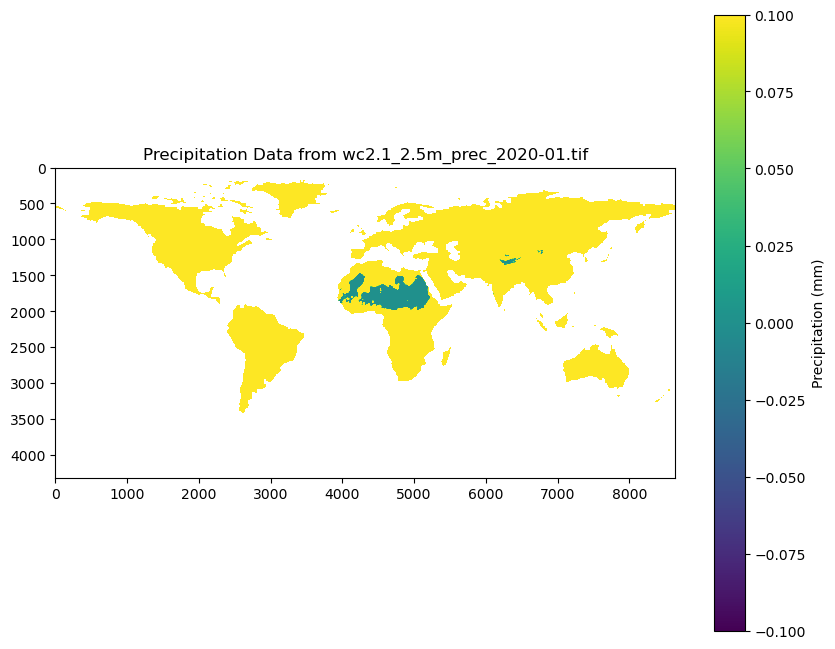

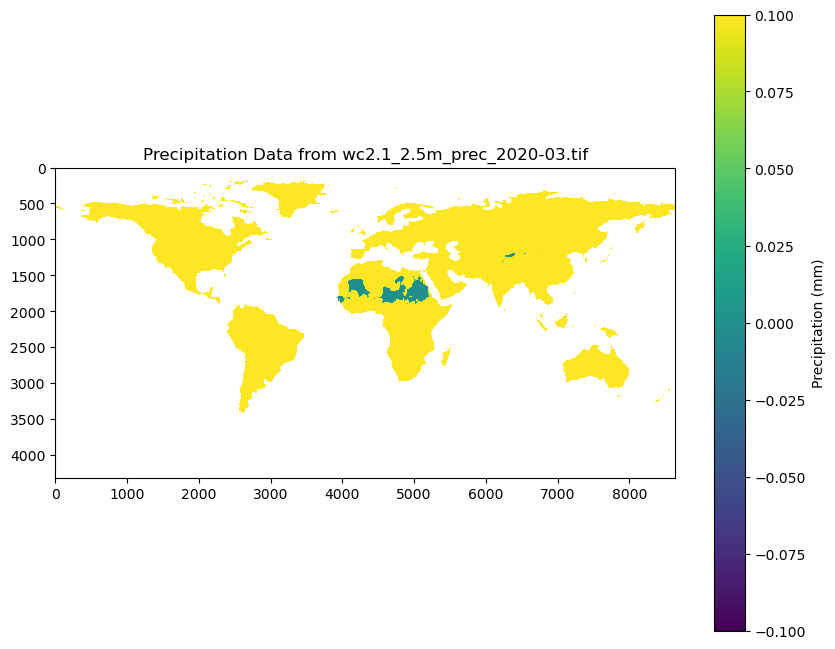

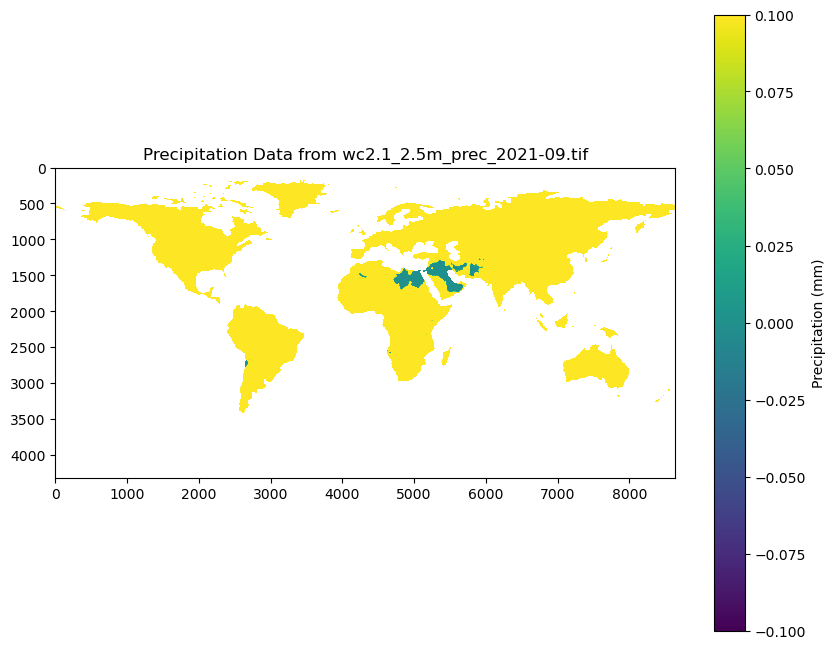

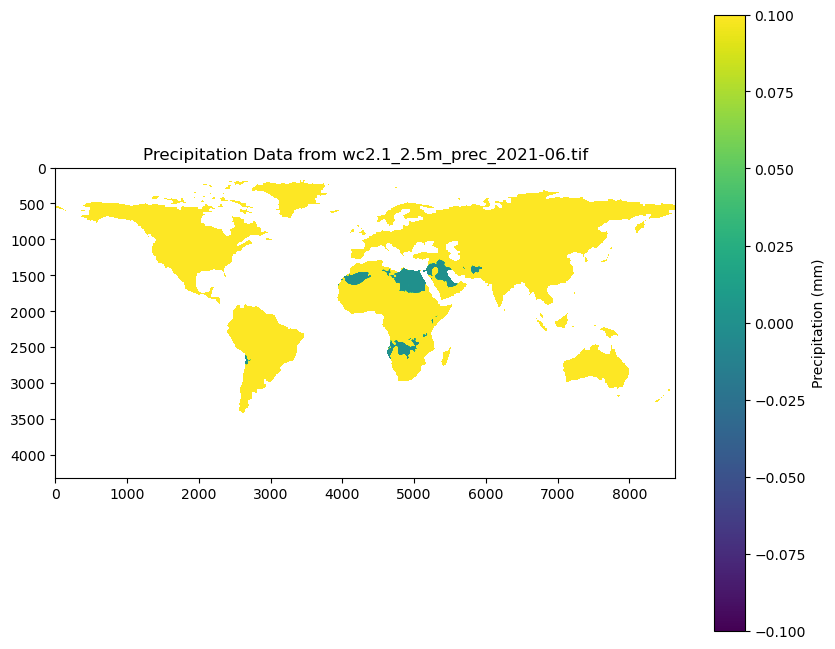

KeyboardInterrupt: 

In [32]:
import rasterio
import matplotlib.pyplot as plt
import os

def visualize_tif_files(directory, num_files=5):
    # List all .tif files in the directory
    tif_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.tif')]
    
    if not tif_files:
        raise ValueError("No .tif files found in the provided directory.")
    
    # Limit to the number of files to plot
    tif_files = tif_files[:num_files]
    
    for file in tif_files:
        # Open the .tif file
        with rasterio.open(file) as src:
            # Read the data
            data = src.read(1)  # Read the first band
            
            # Plot the data
            plt.figure(figsize=(10, 8))
            plt.imshow(data, cmap='viridis', vmin=data.min(), vmax=data.max())
            plt.colorbar(label='Precipitation (mm)')
            plt.title(f'Precipitation Data from {os.path.basename(file)}')
            plt.show()

# Directory containing the .tif files
directory = '/home/christina/Documents/clim-var-ds-cnf-own/data/wc2.1_cruts4.06_2.5m_prec_2020-2021'

# Example usage
try:
    visualize_tif_files(directory, num_files=5)
except Exception as e:
    print(f"An error occurred: {e}")
